In [2]:
import pandas as pd
import numpy as np 
import torch
from torch import nn
from torch.utils import data
from torch.nn import functional as F
from torchsummary import summary
from torch.autograd import Variable

In [178]:
print('GPU:', torch.cuda.is_available())

GPU: True


# Load Data

In [3]:
# Read the data
import glob,os
path=r'../Dataset/hai-master/hai-21.03'
file=glob.glob(os.path.join(path, "test*.csv"))
print(file)
dl= []
for f in file:
 dl.append(pd.read_csv(f,header=[0],index_col=None))
test_df=pd.concat(dl)

['../Dataset/hai-master/hai-21.03\\test1.csv', '../Dataset/hai-master/hai-21.03\\test2.csv', '../Dataset/hai-master/hai-21.03\\test3.csv', '../Dataset/hai-master/hai-21.03\\test4.csv', '../Dataset/hai-master/hai-21.03\\test5.csv']


In [180]:
# Read the data
import glob,os
path=r'../Dataset/hai-master/hai-21.03'
file=glob.glob(os.path.join(path, "test2.csv"))
print(file)
dl= []
for f in file:
 dl.append(pd.read_csv(f,header=[0],index_col=None))
test2_df=pd.concat(dl)

['../Dataset/hai-master/hai-21.03\\test2.csv']


In [181]:
# # Read the data
# import glob,os
# path=r'../Dataset/hai-master/hai-21.03'
# file=glob.glob(os.path.join(path, "train*.csv"))
# print(file)
# dl= []
# for f in file:
#  dl.append(pd.read_csv(f,header=[0],index_col=None))
# train_df=pd.concat(dl)

In [182]:
# dl= []

In [183]:
# dl.append(pd.read_csv('../Dataset\\data1.csv',header=[0],index_col=None))
# dl.append(pd.read_csv('../Dataset\\data2.csv',header=[0],index_col=None))
# df=pd.concat(dl)

In [184]:
test_df.shape

(43201, 84)

In [185]:
test_df.head()

,time,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,...,P4_ST_GOV,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,attack,attack_P1,attack_P2,attack_P3
0,2020-07-07 15:00:00,0.10178,1.58771,403.78854,985.37353,32.59527,100.0,2839.58520,36.81010,100.0,...,20469.0,386.26666,380.31683,0,10044.0,27567.0,0,0,0,0
1,2020-07-07 15:00:01,0.10178,1.58725,403.78854,985.37353,32.59527,100.0,2843.37549,36.80895,100.0,...,20489.0,386.30286,380.02747,0,10040.0,27564.0,0,0,0,0
2,2020-07-07 15:00:02,0.10178,1.59519,403.78854,985.37353,32.59527,100.0,2845.06006,36.82879,100.0,...,20604.0,389.73883,381.52850,0,10037.0,27565.0,0,0,0,0
3,2020-07-07 15:00:03,0.10178,1.59747,403.78854,985.37353,32.59527,100.0,2837.33911,36.83451,100.0,...,20633.0,388.94311,382.08911,0,10040.0,27560.0,0,0,0,0
4,2020-07-07 15:00:04,0.10178,1.59869,403.78854,985.37353,32.59527,100.0,2843.37549,36.83756,100.0,...,20738.0,389.72082,383.44543,0,10042.0,27564.0,0,0,0,0


In [186]:
test_df['attack'].value_counts()

0    42572
1      629
Name: attack, dtype: int64

In [187]:
test_df

,time,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,...,P4_ST_GOV,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,attack,attack_P1,attack_P2,attack_P3
0,2020-07-07 15:00:00,0.10178,1.58771,403.78854,985.37353,32.59527,100.00000,2839.58520,36.81010,100.00000,...,20469.0,386.26666,380.31683,0,10044.0,27567.0,0,0,0,0
1,2020-07-07 15:00:01,0.10178,1.58725,403.78854,985.37353,32.59527,100.00000,2843.37549,36.80895,100.00000,...,20489.0,386.30286,380.02747,0,10040.0,27564.0,0,0,0,0
2,2020-07-07 15:00:02,0.10178,1.59519,403.78854,985.37353,32.59527,100.00000,2845.06006,36.82879,100.00000,...,20604.0,389.73883,381.52850,0,10037.0,27565.0,0,0,0,0
3,2020-07-07 15:00:03,0.10178,1.59747,403.78854,985.37353,32.59527,100.00000,2837.33911,36.83451,100.00000,...,20633.0,388.94311,382.08911,0,10040.0,27560.0,0,0,0,0
4,2020-07-07 15:00:04,0.10178,1.59869,403.78854,985.37353,32.59527,100.00000,2843.37549,36.83756,100.00000,...,20738.0,389.72082,383.44543,0,10042.0,27564.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43196,2020-07-08 02:59:56,0.10109,1.61632,395.43826,1115.26257,31.81634,79.42770,2440.14233,36.10442,37.51368,...,21044.0,394.91107,390.13672,50,10053.0,27593.0,0,0,0,0
43197,2020-07-08 02:59:57,0.10109,1.61891,395.43826,1115.26257,31.81634,79.52109,2455.06909,36.11090,37.72263,...,21073.0,397.35248,390.24518,50,10053.0,27599.0,0,0,0,0
43198,2020-07-08 02:59:58,0.10109,1.61815,395.43826,1115.26257,31.81634,79.62234,2446.70361,36.10899,37.83055,...,21064.0,396.70142,390.46222,50,10052.0,27599.0,0,0,0,0
43199,2020-07-08 02:59:59,0.10109,1.62609,395.43826,1115.26257,31.81634,79.71570,2444.73511,36.12883,37.67564,...,21171.0,397.73218,391.78241,50,10053.0,27603.0,0,0,0,0


In [188]:
test_df.describe()

,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,P1_FCV01Z,...,P4_ST_GOV,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,attack,attack_P1,attack_P2,attack_P3
count,43201.000000,43201.000000,43201.000000,43201.000000,43201.000000,43201.000000,43201.000000,43201.000000,43201.000000,43201.000000,...,43201.000000,43201.000000,43201.000000,43201.000000,43201.000000,43201.000000,43201.000000,43201.000000,43201.000000,43201.0
mean,0.101221,1.396985,398.987740,1074.705235,32.317316,63.082296,1885.537917,36.056749,56.355013,56.188993,...,17887.158266,331.511471,331.787760,20.692808,10049.854488,27609.174562,0.014560,0.011111,0.003449,0.0
std,0.000484,0.127081,5.104598,46.375027,0.455703,40.130593,1152.533311,0.556682,42.174724,42.144635,...,1755.223122,36.113908,32.548281,24.626452,19.543202,24.112590,0.119784,0.104822,0.058627,0.0
min,0.100490,1.049520,394.214750,985.373530,31.816340,0.000000,28.005140,34.703660,0.000000,0.268550,...,13075.000000,239.854550,243.001280,0.000000,9807.000000,27539.000000,0.000000,0.000000,0.000000,0.0
25%,0.101090,1.322890,395.438260,1057.218380,31.816340,22.081260,712.246030,35.601640,14.917670,14.459230,...,16863.000000,306.731020,312.789370,0.000000,10051.000000,27596.000000,0.000000,0.000000,0.000000,0.0
50%,0.101090,1.396450,395.438260,1086.267580,32.431240,81.730390,2793.821050,36.092560,57.179540,57.260130,...,17881.000000,332.157840,331.741880,0.000000,10053.000000,27625.000000,0.000000,0.000000,0.000000,0.0
75%,0.101770,1.470140,403.788540,1115.262570,32.595270,100.000000,2836.356440,36.498820,100.000000,99.794000,...,18896.000000,354.437930,350.513550,50.000000,10053.000000,27627.000000,0.000000,0.000000,0.000000,0.0
max,0.101780,1.963000,406.612850,1115.262570,32.963250,100.000000,2860.185300,37.492030,100.000000,99.992370,...,25709.000000,488.805720,476.743350,50.000000,10329.000000,27627.000000,1.000000,1.000000,1.000000,0.0


In [189]:
# np.any(np.isnan(df))

In [190]:
# torch.cuda.is_available()

Data preprocessing

In [191]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
def data_preprocessing(test_df):
    y = test_df.attack
    x = test_df.drop(['attack','attack_P1','attack_P2','attack_P3','time'], axis=1)
    values = x
    # np.all(np.isfinite(values))
    values.replace([np.inf, -np.inf], np.nan, inplace=True)
    #normalization
    scaler = MinMaxScaler()
    X_normalized=scaler.fit_transform(values)
    X_normalized
    from sklearn.model_selection import train_test_split
    # # Divide data into training and validation subsets
    X_train_full, X_valid_full, y_train, y_valid = train_test_split(X_normalized, y, train_size=0.8, test_size=0.2,
                                                                random_state=0, shuffle=False)
    return X_train_full, X_valid_full, y_train, y_valid

In [192]:
# label Encoding
# df['marker'] = df['marker'].replace(['Natural'],0)
# df['marker'] = df['marker'].replace(['Attack'],1)
# df['marker'].value_counts()

In [193]:
dataset = test_df.iloc[:]
missing_val_count_by_column = (dataset.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Series([], dtype: int64)


In [194]:
dataset2 = test2_df.iloc[:]

In [195]:
# #normalization
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler(feature_range=(-1,1))
# df_normalized=scaler.fit_transform(dataset.values.reshape(-1,1))

In [196]:
# Separate target from predictors
y = test_df.attack
test_x = test_df.drop(['attack','attack_P1','attack_P2','attack_P3','time'], axis=1)

In [197]:
y_2 = test2_df.attack
test2_x = test2_df.drop(['attack','attack_P1','attack_P2','attack_P3','time'], axis=1)

In [198]:
print(y_2.shape)
print(test2_x .shape)

(118801,)
(118801, 79)


In [199]:
print(y.shape)
print(test_x.shape)

(43201,)
(43201, 79)


In [200]:
values = test_x
# np.all(np.isfinite(values))
values.replace([np.inf, -np.inf], np.nan, inplace=True)


In [201]:
#normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_normalized=scaler.fit_transform(values)
X_normalized

array([[1.        , 0.58916451, 0.77219816, ..., 0.        , 0.45402299,
        0.31818182],
       [1.        , 0.58866094, 0.77219816, ..., 0.        , 0.44636015,
        0.28409091],
       [1.        , 0.59735298, 0.77219816, ..., 0.        , 0.44061303,
        0.29545455],
       ...,
       [0.46511628, 0.62248763, 0.09868528, ..., 1.        , 0.46934866,
        0.68181818],
       [0.46511628, 0.63117966, 0.09868528, ..., 1.        , 0.47126437,
        0.72727273],
       [0.46511628, 0.63634672, 0.09868528, ..., 1.        , 0.47126437,
        0.63636364]])

In [202]:
from sklearn.model_selection import train_test_split
# # Divide data into training and validation subsets
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X_normalized, y, train_size=0.5, test_size=0.3,
                                                                random_state=0, shuffle=False)

In [203]:
X_train_full.shape

(21600, 79)

In [204]:
# from keras.preprocessing.sequence import TimeseriesGenerator

In [205]:
X_train_full

array([[1.        , 0.58916451, 0.77219816, ..., 0.        , 0.45402299,
        0.31818182],
       [1.        , 0.58866094, 0.77219816, ..., 0.        , 0.44636015,
        0.28409091],
       [1.        , 0.59735298, 0.77219816, ..., 0.        , 0.44061303,
        0.29545455],
       ...,
       [0.99224806, 0.37734816, 0.        , ..., 0.        , 0.49425287,
        0.80681818],
       [0.99224806, 0.38887551, 0.        , ..., 0.        , 0.47126437,
        0.75      ],
       [0.99224806, 0.38786837, 0.        , ..., 0.        , 0.47126437,
        0.84090909]])

In [206]:
y_train

0        0
1        0
2        0
3        0
4        0
        ..
21595    0
21596    0
21597    0
21598    0
21599    0
Name: attack, Length: 21600, dtype: int64

In [207]:
#function to convert to time domain dataset
def create_dataset(X, time_steps):
    Xs = []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
    return np.array(Xs)

In [208]:
# 79 + 1 column

def create_Used_Dataset(X):
    label_column = np.ones((len(X),1), dtype = np.object)
    # used = 1
    label_column[:] = "used"
    print(X.shape,label_column.shape)
    labeled_X = np.c_[X[:,0],label_column]
    return labeled_X


 60  3351
 x * 60

In [209]:
def data_Selection(used_dataset):  
    
    return used_dataset


used=1 mature=2 preserve=3 Discard=4

In [210]:
# X_train = pd.DataFrame(X_train_full)
# test_x, v =  create_dataset(X_train, 1)
# test_x.shape

In [211]:
# labeled_X = create_Used_Dataset(test_x)

In [212]:
# labeled_X

In [213]:
# labeled_X.shape

In [214]:
# def data_Selection(used_dataset):


In [215]:
array = np.empty((4019,1))

In [216]:
array[:] = 1

In [217]:
# reshape to [samples, time_steps, n_features]

TIME_STEPS = 1
X_train = pd.DataFrame(X_train_full)
X_train = create_dataset(X_train, TIME_STEPS)
y_train = pd.DataFrame(y_train)
y_train = create_dataset(y_train, TIME_STEPS)
X_valid = pd.DataFrame(X_valid_full)
X_valid = create_dataset(X_valid, TIME_STEPS)
y_valid = pd.DataFrame(y_valid)
y_valid = create_dataset(y_valid, TIME_STEPS)
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)


(21599, 1, 79)
(21599, 1, 1)
(12960, 1, 79)
(12960, 1, 1)


In [218]:
X_train[1]

array([[1.00000000e+00, 5.88660945e-01, 7.72198159e-01, 0.00000000e+00,
        6.79155296e-01, 1.00000000e+00, 9.94064710e-01, 7.55025337e-01,
        1.00000000e+00, 9.99234987e-01, 0.00000000e+00, 3.07852758e-04,
        3.04379107e-01, 3.22222285e-01, 2.52870604e-01, 4.87429581e-01,
        9.88299120e-01, 9.94659506e-01, 5.23631731e-01, 5.90182566e-01,
        2.80442318e-01, 2.73194067e-01, 1.62877630e-01, 2.95910648e-01,
        3.00209376e-01, 0.00000000e+00, 1.63552175e-01, 4.63048094e-01,
        4.80859032e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        7.53440645e-02, 3.09865863e-02, 3.56638155e-01, 0.00000000e+00,
        0.00000000e+00, 6.84379001e-01, 0.00000000e+00, 4.31492048e-01,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        7.05084746e-01, 7.05506333e-01, 0.00000000e+00, 7.22790861e-01,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.000000

In [219]:
# reshape input to be 3D [samples, timesteps, features]
# X_train_full = X_train_full.reshape((X_train_full.shape[0], 1, X_train_full.shape[1]))
# X_valid_full = X_valid_full.reshape((X_valid_full.shape[0], 1, X_valid_full.shape[1]))
# print(X_train_full.shape, y_train.shape, X_valid_full.shape, y_valid.shape) 

# Construct Model

In [220]:
# class LSTM(nn.Module):
#     def __init__(self,input_size, output_size, hidden_size, num_layers):
#         super(LSTM,self).__init__()
#         self.input_size = input_size
#         self.output_size = output_size
#         self.num_layers = num_layers
#         self.hidden_size = hidden_size
        
        

       
#         self.lstm1 = nn.LSTM(input_size=input_size, 
#                             hidden_size=hidden_size,
#                             num_layers=num_layers, 
#                             batch_first=False,dropout = 0)
#         self.lstm2 = nn.LSTM(input_size=hidden_size, 
#                             hidden_size=32,
#                             num_layers=num_layers, 
#                             batch_first=False,dropout = 0)
#         self.dropout1 = nn.Dropout(p=0.3)
#         self.dropout2 = nn.Dropout(p=0.3)
#         self.fc = nn.Linear(32,output_size)
      
#         self.sigmoid = nn.Sigmoid()
     
#     def forward(self, x):   
#         per_out=[]
#         lstm_out, self.hidden_cell = self.lstm1(x)
#         per_out.append(lstm_out)
#         lstm_out = self.dropout1(lstm_out)
#         lstm_out, self.hidden_cell = self.lstm2(lstm_out)
#         per_out.append(lstm_out)
#         lstm_out = self.dropout2(lstm_out)
#         out = self.fc(lstm_out)
#         per_out.append(out)
#         score = self.sigmoid(out)
#         return score, per_out

In [221]:
class LSTM(nn.Module):
    def __init__(self,input_size, output_size, hidden_size, num_layers):
        super(LSTM,self).__init__()
        self.input_size = input_size
        self.output_size = output_size
        self.num_layers = num_layers
        self.hidden_size = hidden_size
        #layer 1
        self.lstm = nn.LSTM(self.input_size, 
                            self.hidden_size,
                            self.num_layers,
                            batch_first=False,dropout = 0)

        self.dropout = nn.Dropout(p=0.3)
        #layer 2
        self.fc = nn.Linear(hidden_size,output_size)
      
        self.sigmoid = nn.Sigmoid()
     
    def forward(self, x):     
        per_out=[]
        lstm_out, self.hidden_cell = self.lstm(x)
        per_out.append(lstm_out)
        lstm_out = self.dropout(lstm_out)    
        out = self.fc(lstm_out)
        per_out.append(out)
        score = self.sigmoid(out)
        return score, per_out

In [222]:
def evaluate_accuracy(x,y,model):
    output,pre_out = model(x)
    output = torch.reshape(output,[-1,1])
    correct = (output.ge(0.5) == y).sum().item()
    n = y.shape[0]
    return correct/n

In [223]:
input_size = 79
output_size = 1
hidden_size = 20
num_layers =2

device = torch.device('cuda')
model = LSTM(input_size,output_size, hidden_size, num_layers).to(device)
loss_function = nn.BCELoss().to(device)
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
# optimizer = torch.optim.SGD(model.parameters(),lr=0.01)

In [224]:
for index, param in enumerate(model.parameters()):
    print(param)

Parameter containing:
tensor([[ 0.0097,  0.1223,  0.0981,  ...,  0.0648,  0.0081, -0.1893],
        [-0.0283, -0.0246, -0.0361,  ...,  0.1849,  0.1704, -0.1921],
        [ 0.1522, -0.1829,  0.1077,  ..., -0.0982,  0.1065, -0.1671],
        ...,
        [-0.0662,  0.2204,  0.0503,  ..., -0.0631, -0.1204,  0.1096],
        [-0.1640, -0.2136, -0.1596,  ..., -0.1262, -0.0452, -0.1290],
        [ 0.2227, -0.1799, -0.0582,  ...,  0.2056, -0.1001, -0.0241]],
       device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[ 0.1253,  0.1299,  0.0752,  ..., -0.1609,  0.0816,  0.0435],
        [ 0.0207,  0.1599,  0.2135,  ...,  0.1836,  0.0710, -0.0837],
        [ 0.1064, -0.2162, -0.0100,  ..., -0.0444, -0.1186,  0.0595],
        ...,
        [ 0.0444,  0.0556, -0.0021,  ..., -0.0147,  0.2123,  0.1002],
        [ 0.0215,  0.0437,  0.1318,  ..., -0.2175, -0.1748,  0.0072],
        [-0.1963, -0.0608,  0.0080,  ..., -0.0820,  0.2086, -0.0087]],
       device='cuda:0', requires_grad=True)


In [225]:
def getDataloader(X_train_full,y_train,X_valid_full,y_valid):
    TIME_STEPS = 1
    X_train = pd.DataFrame(X_train_full)
    X_train = create_dataset(X_train, TIME_STEPS)
    y_train = pd.DataFrame(y_train)
    y_train = create_dataset(y_train, TIME_STEPS)
    X_valid = pd.DataFrame(X_valid_full)
    X_valid = create_dataset(X_valid, TIME_STEPS)
    y_valid = pd.DataFrame(y_valid)
    y_valid = create_dataset(y_valid, TIME_STEPS)
# 将输入和输出封装进Data.TensorDataset()类对象
    x = torch.tensor(X_train[:,:,:]).float()
    x = torch.where(torch.isnan(x), torch.full_like(x, 0), x)
    y = y_train[:]
    y = np.array(y)
# y = torch.tensor(np.reshape(y,[-1,1]))
    y = torch.tensor(y)
    y = y.float()
    torch_dataset = Data.TensorDataset(x,y)
    train_dataloader = torch.utils.data.DataLoader(torch_dataset, batch_size=60, shuffle=False, num_workers=0)
    return X_train, y_train, X_valid, y_valid, train_dataloader

In [226]:
import torch.utils.data as Data
# 将输入和输出封装进Data.TensorDataset()类对象
x = torch.tensor(X_train[:,:,:]).float()
x = torch.where(torch.isnan(x), torch.full_like(x, 0), x)
    
y = y_train[:]
y = np.array(y)
# y = torch.tensor(np.reshape(y,[-1,1]))
y = torch.tensor(y)
y = y.float()
print(x.shape)
print(y.shape)

torch_dataset = Data.TensorDataset(x,y)

torch.Size([21599, 1, 79])
torch.Size([21599, 1, 1])


In [227]:
BATCH_SIZE = 60
train_dataloader = torch.utils.data.DataLoader(torch_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

In [228]:
# train_dataloader = torch.utils.data.DataLoader(train_datasets, batch_size=batch_size, shuffle=True, num_workers=2)

# Training and Evaluation

In [229]:
train_dataloader.batch_size

60

In [230]:
len(train_dataloader)

360

In [231]:
batch_array = np.zeros(len(train_dataloader))
batch_index_array = np.zeros(len(train_dataloader))

In [232]:
len(X_train)

21599

In [233]:
import time

time_start=time.time()

epochs = 1

for epoch in range(epochs):
    model.train()
    for batch, (batch_x, batch_y) in enumerate(train_dataloader):   
        batch_x = batch_x.cuda()   
        output,pre_out = model(batch_x)
        output = torch.reshape(output,[-1,1])

        batch_y = np.array(batch_y)
        batch_y = torch.tensor(np.reshape(batch_y,[-1,1]))
        batch_y = batch_y.float()
        batch_y = batch_y.cuda()

        loss = loss_function(output,batch_y)
        acc = evaluate_accuracy(batch_x,batch_y,model)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        batch_array[batch] = loss.item()
        batch_index_array[batch] = batch
        if epoch % 5 == 0:
            print("epoch:{} batch:{} loss:{} acc:{}".format(epoch,batch,loss.item(),acc))

time_end=time.time()
print('totally cost',time_end-time_start)

epoch:0 batch:0 loss:0.6861326694488525 acc:0.7166666666666667
epoch:0 batch:1 loss:0.6716771721839905 acc:0.8666666666666667
epoch:0 batch:2 loss:0.6658393144607544 acc:0.9833333333333333
epoch:0 batch:3 loss:0.6536169052124023 acc:1.0
epoch:0 batch:4 loss:0.6416021585464478 acc:1.0
epoch:0 batch:5 loss:0.6356636881828308 acc:1.0
epoch:0 batch:6 loss:0.6288419961929321 acc:1.0
epoch:0 batch:7 loss:0.6216787695884705 acc:1.0
epoch:0 batch:8 loss:0.6118190288543701 acc:1.0
epoch:0 batch:9 loss:0.6133900284767151 acc:1.0
epoch:0 batch:10 loss:0.6042981147766113 acc:1.0
epoch:0 batch:11 loss:0.5939995050430298 acc:1.0
epoch:0 batch:12 loss:0.5919099450111389 acc:1.0
epoch:0 batch:13 loss:0.5850862264633179 acc:1.0
epoch:0 batch:14 loss:0.5766014456748962 acc:1.0
epoch:0 batch:15 loss:0.5673210620880127 acc:1.0
epoch:0 batch:16 loss:0.5603839755058289 acc:1.0
epoch:0 batch:17 loss:0.5436512231826782 acc:1.0
epoch:0 batch:18 loss:0.5433212518692017 acc:1.0
epoch:0 batch:19 loss:0.5279444456

epoch:0 batch:166 loss:0.04033819958567619 acc:1.0
epoch:0 batch:167 loss:0.03940659388899803 acc:1.0
epoch:0 batch:168 loss:0.044364750385284424 acc:1.0
epoch:0 batch:169 loss:0.04610845446586609 acc:1.0
epoch:0 batch:170 loss:0.04447421431541443 acc:1.0
epoch:0 batch:171 loss:0.04193956032395363 acc:1.0
epoch:0 batch:172 loss:0.04601486772298813 acc:1.0
epoch:0 batch:173 loss:0.04003949463367462 acc:1.0
epoch:0 batch:174 loss:0.043193548917770386 acc:1.0
epoch:0 batch:175 loss:0.037715211510658264 acc:1.0
epoch:0 batch:176 loss:0.0382966622710228 acc:1.0
epoch:0 batch:177 loss:0.04169550910592079 acc:1.0
epoch:0 batch:178 loss:0.03645186126232147 acc:1.0
epoch:0 batch:179 loss:0.03927057608962059 acc:1.0
epoch:0 batch:180 loss:0.04188143089413643 acc:1.0
epoch:0 batch:181 loss:0.038578957319259644 acc:1.0
epoch:0 batch:182 loss:0.04177287220954895 acc:1.0
epoch:0 batch:183 loss:0.037716109305620193 acc:1.0
epoch:0 batch:184 loss:0.03899414837360382 acc:1.0
epoch:0 batch:185 loss:0.04

epoch:0 batch:331 loss:0.03145119547843933 acc:1.0
epoch:0 batch:332 loss:0.02818908356130123 acc:1.0
epoch:0 batch:333 loss:0.031700439751148224 acc:1.0
epoch:0 batch:334 loss:0.03041651099920273 acc:1.0
epoch:0 batch:335 loss:0.03476327657699585 acc:1.0
epoch:0 batch:336 loss:0.02654797025024891 acc:1.0
epoch:0 batch:337 loss:0.031760700047016144 acc:1.0
epoch:0 batch:338 loss:0.02990921586751938 acc:1.0
epoch:0 batch:339 loss:0.03121052123606205 acc:1.0
epoch:0 batch:340 loss:0.02949812449514866 acc:1.0
epoch:0 batch:341 loss:0.03130320459604263 acc:1.0
epoch:0 batch:342 loss:0.029903993010520935 acc:1.0
epoch:0 batch:343 loss:0.029266012832522392 acc:1.0
epoch:0 batch:344 loss:0.029973505064845085 acc:1.0
epoch:0 batch:345 loss:0.029459534212946892 acc:1.0
epoch:0 batch:346 loss:0.03688349202275276 acc:1.0
epoch:0 batch:347 loss:0.03193017840385437 acc:1.0
epoch:0 batch:348 loss:0.029184890910983086 acc:1.0
epoch:0 batch:349 loss:0.029005588963627815 acc:1.0
epoch:0 batch:350 loss:

In [234]:
model.eval()
x = torch.tensor( X_train[:,:,:]).float()
x = torch.where(torch.isnan(x), torch.full_like(x, 0), x)
    
y = y_train[:]
y = np.array(y)
y = torch.tensor(np.reshape(y,[-1,1]))
y = y.float()
    
x = x.cuda()
y = y.cuda()

x_valid = torch.tensor(X_valid[:,:,:]).float()
x_valid = torch.where(torch.isnan(x_valid), torch.full_like(x_valid, 0), x_valid)
    
y_val = y_valid[:]
y_val = np.array(y_val)
y_val = torch.tensor(np.reshape(y_val,[-1,1]))
y_val = y_val.float()

x_valid = x_valid.cuda()
y_val = y_val.cuda()

print("epoch:{} loss:{}".format(epoch,loss.item()))
print("train acc", evaluate_accuracy(x,y,model))
print("valid acc:",evaluate_accuracy(x_valid,y_val,model))

epoch:0 loss:0.029820898547768593
train acc 0.9749988425390065
valid acc: 0.9931327160493827


In [235]:
batch_array

array([0.68613267, 0.67167717, 0.66583931, 0.65361691, 0.64160216,
       0.63566369, 0.628842  , 0.62167877, 0.61181903, 0.61339003,
       0.60429811, 0.59399951, 0.59190995, 0.58508623, 0.57660145,
       0.56732106, 0.56038398, 0.54365122, 0.54332125, 0.52794445,
       0.51225907, 0.50441164, 0.49921766, 0.47909015, 0.4589898 ,
       0.44606471, 0.43647981, 0.41521558, 0.40717843, 0.39593515,
       0.37135634, 0.36903924, 0.33495283, 0.31818849, 0.31846032,
       1.23448682, 1.41203129, 1.49183583, 0.67591697, 0.29067621,
       0.29648763, 0.29728401, 0.28569916, 0.30379647, 0.28934088,
       0.27907211, 0.28011206, 0.28963861, 0.27379668, 0.2715345 ,
       0.26978642, 0.27076396, 0.25127003, 0.24788213, 0.22847879,
       0.22440076, 0.23126578, 0.22685726, 0.21637729, 0.2056044 ,
       0.19949116, 0.2037472 , 0.19272275, 0.17659198, 0.17449979,
       0.17763686, 0.16994995, 0.16128388, 0.16551957, 0.15085009,
       0.15255447, 0.14256929, 0.13715363, 0.1407226 , 0.12391

In [236]:
# 1，datafram和array的相互转换
# dataframe转化成array
# df=df.values

# array转化成dataframe

# import pandas as pd

# df = pd.DataFrame(df)
# df1 = df1[(df1['网元ID'] == netid) & (df1['cellId'] == cid)]
# df2 = df2[(df2['网元ID'] == netid) & (df2['cellId'] == cid)]


In [237]:
# each batch loss
batch_df = pd.DataFrame(batch_array)
batch_df

,0
0,0.686133
1,0.671677
2,0.665839
3,0.653617
4,0.641602
...,...
355,0.030548
356,0.032058
357,0.029852
358,0.030306


In [238]:
#data classification
wasted_df = batch_df[batch_df[0] >= 1]
wasted_array = wasted_df.index
wasted_array

Int64Index([35, 36, 37, 148, 149, 239, 240, 241, 242, 321], dtype='int64')

In [239]:
preserve_df = batch_df[batch_df[0] < 1]
preserve_array = preserve_df.index
preserve_array

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            350, 351, 352, 353, 354, 355, 356, 357, 358, 359],
           dtype='int64', length=350)

In [240]:
len(preserve_array)

350

In [241]:
len(wasted_array)

10

In [242]:
#the 60 dataset among 35th batch 
dataset[35*60:(35*60)+60]

,time,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,...,P4_ST_GOV,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,attack,attack_P1,attack_P2,attack_P3
2100,2020-07-07 15:35:00,0.10178,1.45557,403.78854,985.37353,32.59527,76.15913,2842.39282,36.47974,77.36610,...,18728.0,356.08362,348.41577,0,10077.0,27627.0,0,0,0,0
2101,2020-07-07 15:35:01,0.10178,1.45786,403.78854,985.37353,32.59527,76.11606,2838.04102,36.48547,77.28599,...,18732.0,354.74536,348.66901,0,10079.0,27627.0,0,0,0,0
2102,2020-07-07 15:35:02,0.10178,1.45679,403.78854,985.37353,32.59527,76.09527,2826.10840,36.48280,77.06074,...,18757.0,355.52301,349.46472,0,10074.0,27627.0,0,0,0,0
2103,2020-07-07 15:35:03,0.10178,1.45618,403.78854,985.37353,32.59527,76.02886,2822.59912,36.48127,76.88635,...,18811.0,356.57190,350.11572,0,10081.0,27627.0,0,0,0,0
2104,2020-07-07 15:35:04,0.10178,1.45992,403.78854,985.37353,32.59527,76.02498,2825.68750,36.49062,76.77198,...,18845.0,357.81976,350.82105,0,10079.0,27627.0,0,0,0,0
2105,2020-07-07 15:35:05,0.10178,1.46365,403.78854,985.37353,32.59527,76.02109,2828.77588,36.49996,76.65761,...,18909.0,357.54846,351.32739,0,10082.0,27627.0,0,0,0,0
2106,2020-07-07 15:35:06,0.10178,1.46434,403.78854,985.37353,32.59527,75.98675,2829.86383,36.50168,76.50637,...,18968.0,358.09100,352.55713,0,10083.0,27627.0,0,0,0,0
2107,2020-07-07 15:35:07,0.10178,1.46503,403.78854,985.37353,32.59527,75.95240,2830.95178,36.50339,76.35513,...,18988.0,359.84521,352.75610,0,10077.0,27627.0,0,0,0,0
2108,2020-07-07 15:35:08,0.10178,1.47342,403.78854,985.37353,32.59527,75.92616,2831.72388,36.52438,75.79694,...,18967.0,356.57190,352.91888,0,10081.0,27627.0,0,0,0,0
2109,2020-07-07 15:35:09,0.10178,1.47235,403.78854,985.37353,32.59527,75.89323,2833.12744,36.52171,76.02171,...,19007.0,358.19952,353.56988,0,10078.0,27627.0,0,0,0,0


In [243]:
used_dataset = dataset
new_dataset = dataset2

In [244]:
#data selection
discard_array = None
for batch_index in wasted_array:
    print(batch_index)
    if type(discard_array) != "numpy.ndarray":
        index = batch_index * 60 
        used_dataset[index:(index+60)] = new_dataset[index:(index+60)]       

35
36
37
148
149
239
240
241
242
321


In [245]:
used_dataset[35*60:(35*60)+60]

,time,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,...,P4_ST_GOV,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,attack,attack_P1,attack_P2,attack_P3
2100,2020-07-09 15:35:00,0.09874,1.31353,382.21698,1118.61084,32.0,100.0,2836.21582,35.53696,100.0,...,16679.0,295.35590,309.06396,0,10052.0,27554.0,0,0,0,0
2101,2020-07-09 15:35:01,0.09874,1.31185,382.21698,1118.61084,32.0,100.0,2833.26807,35.53276,100.0,...,16603.0,295.62720,307.92462,0,10052.0,27560.0,0,0,0,0
2102,2020-07-09 15:35:02,0.09874,1.31063,382.21698,1118.61084,32.0,100.0,2842.53296,35.52971,100.0,...,16534.0,294.57825,307.11084,0,10052.0,27557.0,0,0,0,0
2103,2020-07-09 15:35:03,0.09874,1.30483,382.21698,1118.61084,32.0,100.0,2838.60254,35.51521,100.0,...,16500.0,292.93256,306.00769,0,10052.0,27553.0,0,0,0,0
2104,2020-07-09 15:35:04,0.09874,1.30010,382.21698,1118.61084,32.0,100.0,2829.33740,35.50339,100.0,...,16447.0,294.10809,304.99493,0,10052.0,27557.0,0,0,0,0
2105,2020-07-09 15:35:05,0.09874,1.29308,382.21698,1118.61084,32.0,100.0,2836.63721,35.48584,100.0,...,16357.0,292.15497,303.42157,0,10052.0,27551.0,0,0,0,0
2106,2020-07-09 15:35:06,0.09874,1.29125,382.21698,1118.61084,32.0,100.0,2835.51392,35.48126,100.0,...,16293.0,290.81671,302.42694,0,10052.0,27553.0,0,0,0,0
2107,2020-07-09 15:35:07,0.09874,1.28835,382.21698,1118.61084,32.0,100.0,2843.23486,35.47401,100.0,...,16296.0,290.09332,302.48120,0,10052.0,27557.0,0,0,0,0
2108,2020-07-09 15:35:08,0.09874,1.28499,382.21698,1118.61084,32.0,100.0,2831.30273,35.46562,100.0,...,16252.0,290.50928,301.25146,0,10052.0,27556.0,0,0,0,0
2109,2020-07-09 15:35:09,0.09874,1.27950,382.21698,1118.61084,32.0,100.0,2844.63892,35.45189,100.0,...,16276.0,294.75909,301.45038,0,10052.0,27562.0,0,0,0,0


In [246]:
len(used_dataset)

43201

In [247]:
X_train_full, X_valid_full, y_train, y_valid = data_preprocessing(used_dataset)
X_train, y_train, X_valid, y_valid, train_dataloader = getDataloader(X_train_full,y_train,X_valid_full,y_valid)

In [248]:
batch_array = np.zeros(len(train_dataloader))
batch_index_array = np.zeros(len(train_dataloader))

In [249]:
#after data selection
import time

time_start=time.time()

epochs = 1

for epoch in range(epochs):
    model.train()
    for batch, (batch_x, batch_y) in enumerate(train_dataloader):   
        batch_x = batch_x.cuda()   
        output,pre_out = model(batch_x)
        output = torch.reshape(output,[-1,1])

        batch_y = np.array(batch_y)
        batch_y = torch.tensor(np.reshape(batch_y,[-1,1]))
        batch_y = batch_y.float()
        batch_y = batch_y.cuda()

        loss = loss_function(output,batch_y)
        acc = evaluate_accuracy(batch_x,batch_y,model)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        batch_array[batch] = loss.item()
        batch_index_array[batch] = batch
        if epoch % 5 == 0:
            print("epoch:{} batch:{} loss:{} acc:{}".format(epoch,batch,loss.item(),acc))

time_end=time.time()
print('totally cost',time_end-time_start)

epoch:0 batch:0 loss:0.029149170964956284 acc:1.0
epoch:0 batch:1 loss:0.028270607814192772 acc:1.0
epoch:0 batch:2 loss:0.02602110058069229 acc:1.0
epoch:0 batch:3 loss:0.03966027870774269 acc:1.0
epoch:0 batch:4 loss:0.03231368586421013 acc:1.0
epoch:0 batch:5 loss:0.0329996794462204 acc:1.0
epoch:0 batch:6 loss:0.03085051104426384 acc:1.0
epoch:0 batch:7 loss:0.0288702342659235 acc:1.0
epoch:0 batch:8 loss:0.030128099024295807 acc:1.0
epoch:0 batch:9 loss:0.03206567093729973 acc:1.0
epoch:0 batch:10 loss:0.027655620127916336 acc:1.0
epoch:0 batch:11 loss:0.031139861792325974 acc:1.0
epoch:0 batch:12 loss:0.02968159131705761 acc:1.0
epoch:0 batch:13 loss:0.0288881566375494 acc:1.0
epoch:0 batch:14 loss:0.02867879346013069 acc:1.0
epoch:0 batch:15 loss:0.03275855630636215 acc:1.0
epoch:0 batch:16 loss:0.029440337792038918 acc:1.0
epoch:0 batch:17 loss:0.031243758276104927 acc:1.0
epoch:0 batch:18 loss:0.025288013741374016 acc:1.0
epoch:0 batch:19 loss:0.028839340433478355 acc:1.0
epoc

epoch:0 batch:173 loss:0.01896284520626068 acc:1.0
epoch:0 batch:174 loss:0.01819509081542492 acc:1.0
epoch:0 batch:175 loss:0.016129540279507637 acc:1.0
epoch:0 batch:176 loss:0.01444209087640047 acc:1.0
epoch:0 batch:177 loss:0.01687796041369438 acc:1.0
epoch:0 batch:178 loss:0.01876358687877655 acc:1.0
epoch:0 batch:179 loss:0.014561565592885017 acc:1.0
epoch:0 batch:180 loss:0.013598006218671799 acc:1.0
epoch:0 batch:181 loss:0.021395180374383926 acc:1.0
epoch:0 batch:182 loss:0.01737431436777115 acc:1.0
epoch:0 batch:183 loss:0.014792872592806816 acc:1.0
epoch:0 batch:184 loss:0.015139689669013023 acc:1.0
epoch:0 batch:185 loss:0.017013100907206535 acc:1.0
epoch:0 batch:186 loss:0.01451321691274643 acc:1.0
epoch:0 batch:187 loss:0.01588578335940838 acc:1.0
epoch:0 batch:188 loss:0.01634557731449604 acc:1.0
epoch:0 batch:189 loss:0.016459880396723747 acc:1.0
epoch:0 batch:190 loss:0.018009794875979424 acc:1.0
epoch:0 batch:191 loss:0.01770041510462761 acc:1.0
epoch:0 batch:192 loss

epoch:0 batch:336 loss:0.01025494746863842 acc:1.0
epoch:0 batch:337 loss:0.012923648580908775 acc:1.0
epoch:0 batch:338 loss:0.014376872219145298 acc:1.0
epoch:0 batch:339 loss:0.01061848271638155 acc:1.0
epoch:0 batch:340 loss:0.010884450748562813 acc:1.0
epoch:0 batch:341 loss:0.013400443829596043 acc:1.0
epoch:0 batch:342 loss:0.012867232784628868 acc:1.0
epoch:0 batch:343 loss:0.0124802952632308 acc:1.0
epoch:0 batch:344 loss:0.013156899251043797 acc:1.0
epoch:0 batch:345 loss:0.010592139326035976 acc:1.0
epoch:0 batch:346 loss:0.010839870199561119 acc:1.0
epoch:0 batch:347 loss:0.010715003125369549 acc:1.0
epoch:0 batch:348 loss:0.011329285800457 acc:1.0
epoch:0 batch:349 loss:0.013040771707892418 acc:1.0
epoch:0 batch:350 loss:0.01137623656541109 acc:1.0
epoch:0 batch:351 loss:0.010811827145516872 acc:1.0
epoch:0 batch:352 loss:0.012568198144435883 acc:1.0
epoch:0 batch:353 loss:0.01086288969963789 acc:1.0
epoch:0 batch:354 loss:0.011240396648645401 acc:1.0
epoch:0 batch:355 los

epoch:0 batch:502 loss:0.010121840983629227 acc:1.0
epoch:0 batch:503 loss:0.009796942584216595 acc:1.0
epoch:0 batch:504 loss:0.012231999076902866 acc:1.0
epoch:0 batch:505 loss:0.009622163139283657 acc:1.0
epoch:0 batch:506 loss:0.008633594028651714 acc:1.0
epoch:0 batch:507 loss:0.012177426367998123 acc:1.0
epoch:0 batch:508 loss:0.012780355289578438 acc:1.0
epoch:0 batch:509 loss:0.010659698396921158 acc:1.0
epoch:0 batch:510 loss:0.009522560052573681 acc:1.0
epoch:0 batch:511 loss:0.010407003574073315 acc:1.0
epoch:0 batch:512 loss:0.011754491366446018 acc:1.0
epoch:0 batch:513 loss:0.008656828664243221 acc:1.0
epoch:0 batch:514 loss:0.010756149888038635 acc:1.0
epoch:0 batch:515 loss:0.011004168540239334 acc:1.0
epoch:0 batch:516 loss:0.009439325891435146 acc:1.0
epoch:0 batch:517 loss:0.013899194076657295 acc:1.0
epoch:0 batch:518 loss:0.010807962156832218 acc:1.0
epoch:0 batch:519 loss:0.00967590045183897 acc:1.0
epoch:0 batch:520 loss:0.011030775494873524 acc:1.0
epoch:0 batch

In [250]:
model.eval()
x = torch.tensor( X_train[:,:,:]).float()
x = torch.where(torch.isnan(x), torch.full_like(x, 0), x)
    
y = y_train[:]
y = np.array(y)
y = torch.tensor(np.reshape(y,[-1,1]))
y = y.float()
    
x = x.cuda()
y = y.cuda()

x_valid = torch.tensor(X_valid[:,:,:]).float()
x_valid = torch.where(torch.isnan(x_valid), torch.full_like(x_valid, 0), x_valid)
    
y_val = y_valid[:]
y_val = np.array(y_val)
y_val = torch.tensor(np.reshape(y_val,[-1,1]))
y_val = y_val.float()

x_valid = x_valid.cuda()
y_val = y_val.cuda()

print("epoch:{} loss:{}".format(epoch,loss.item()))
print("train acc", evaluate_accuracy(x,y,model))
print("valid acc:",evaluate_accuracy(x_valid,y_val,model))

epoch:0 loss:0.008908159099519253
train acc 0.9960936369686623
valid acc: 1.0


In [251]:
len(X_train)

34559

In [252]:
train_dataloader.batch_size

60

In [254]:
remind_array = X_train[0:0+60]
type(remind_array)

numpy.ndarray

In [255]:
remind_array = None
for batch_index in preserve_array:
    print(batch_index)
    if type(remind_array) != "numpy.ndarray":
        remind_array = X_train[batch_index:batch_index+60]
    batch_index = index * 60    
    remind_array = np.r_[remind_array,X_train[batch_index:batch_index+60]]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285

In [256]:
torch.cuda.empty_cache()

4019 42.43043494224548 40199  281.12068939208984 120600 820.6956114768982  201001 1340  361803 2563.249900817871

9031    64.93641090393066
23512   162.0211820602417
39187   271.4542453289032
70538   484.0234043598175


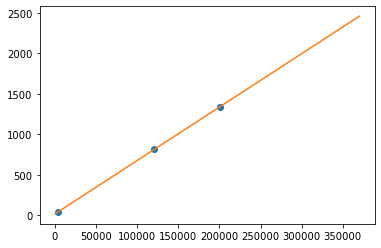

In [257]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
#4019 42.43043494224548 40199  40199  281.12068939208984 120600 820.6956114768982  201001 1340  361803 2563.249900817871
x = [[4019],[120600],[201001] ]
y = [[42],[820.6956114768982],[1340]]
reg = LinearRegression().fit(x,y)
x_pre = np.linspace(0,370000,5)
x_pre = x_pre.reshape(-1,1)
y_pre = reg.predict(x_pre)
plt.plot(x, y,'o')
plt.plot(x_pre, y_pre)
plt.show()

In [258]:
reg.predict([[361803]])

array([[2404.72537245]])

In [259]:
a = reg.coef_
b = reg.intercept_
print(a,b)

[[0.00659588]] [18.31456436]


In [260]:
model.eval()
x = torch.tensor( X_train[:,:,:]).float()
x = torch.where(torch.isnan(x), torch.full_like(x, 0), x)
    
y = y_train[:]
y = np.array(y)
y = torch.tensor(np.reshape(y,[-1,1]))
y = y.float()
    
x = x.cuda()
y = y.cuda()

x_valid = torch.tensor(X_valid[:,:,:]).float()
x_valid = torch.where(torch.isnan(x_valid), torch.full_like(x_valid, 0), x_valid)
    
y_val = y_valid[:]
y_val = np.array(y_val)
y_val = torch.tensor(np.reshape(y_val,[-1,1]))
y_val = y_val.float()

x_valid = x_valid.cuda()
y_val = y_val.cuda()

train_acc = evaluate_accuracy(x_valid,y_val,model)
print("epoch:{} loss:{}".format(epoch,loss.item()))
print("train acc", evaluate_accuracy(x,y,model))
print("valid acc:",train_acc)

epoch:0 loss:0.008908159099519253
train acc 0.9960936369686623
valid acc: 1.0


In [262]:
import sklearn.metrics as sm
output,pre_out = model(x_valid)
output = torch.reshape(output,[-1,1])
output = output.ge(0.5)

output_cpu = output.cpu()
cr = sm.classification_report(y_valid[:,0], output_cpu)
cr

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      8640\n\n    accuracy                           1.00      8640\n   macro avg       1.00      1.00      1.00      8640\nweighted avg       1.00      1.00      1.00      8640\n'

# update